### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Import dataset

In [2]:
applicant_data_csv = pd.read_csv("https://raw.githubusercontent.com/msaribekyan/pre-interview_assessment/refs/heads/main/data/logatta.csv")
applicant_data_csv

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False
...,...,...,...,...,...,...,...,...,...
1487,35,Travel_Rarely,3,Married,Yes,1856,682,Male,False
1488,35,Travel_Rarely,4,Divorced,No,1857,1103,Male,False
1489,31,Travel_Rarely,3,Single,Yes,1858,976,Male,False
1490,37,Travel_Rarely,4,Single,No,1859,1351,Female,False


### Process data

In [3]:
applicant_data_csv = applicant_data_csv.astype({'accepted for the interview':"int"})

applicant_data_csv = applicant_data_csv.drop("EmployeeNumber", axis=1)

for i in ["BusinessTravel", "MaritalStatus", "OverTime","Gender"]:
  ordinal =OrdinalEncoder()
  applicant_data_csv[[i]]=ordinal.fit_transform(applicant_data_csv[[i]])

for i in ["Age", "Education", "DailyRate"]:
  std =StandardScaler()
  applicant_data_csv[[i]]=std.fit_transform(applicant_data_csv[[i]])

applicant_data = applicant_data_csv.drop("accepted for the interview", axis=1)
applicant_data_labels = applicant_data_csv["accepted for the interview"].copy()

applicant_data_train, applicant_data_test, applicant_data_train_labels, applicant_data_test_labels = train_test_split(applicant_data, applicant_data_labels, test_size=0.2, random_state=42)

applicant_data_csv

,Age,BusinessTravel,Education,MaritalStatus,OverTime,DailyRate,Gender,accepted for the interview
0,0.452168,2.0,-0.897027,2.0,1.0,0.735781,0.0,1
1,1.331314,1.0,-1.876080,1.0,0.0,-1.303018,1.0,0
2,0.012595,2.0,-0.897027,2.0,1.0,1.407124,1.0,0
3,-0.426978,1.0,1.061078,1.0,1.0,1.454192,0.0,0
4,-1.086338,2.0,-1.876080,1.0,0.0,-0.530108,1.0,0
...,...,...,...,...,...,...,...,...
1487,-0.207192,2.0,0.082025,1.0,1.0,-0.304675,1.0,0
1488,-0.207192,2.0,1.061078,0.0,0.0,0.738259,1.0,0
1489,-0.646765,2.0,0.082025,2.0,1.0,0.423644,1.0,0
1490,0.012595,2.0,1.061078,2.0,0.0,1.352624,0.0,0


### Visualize data

<Axes: >

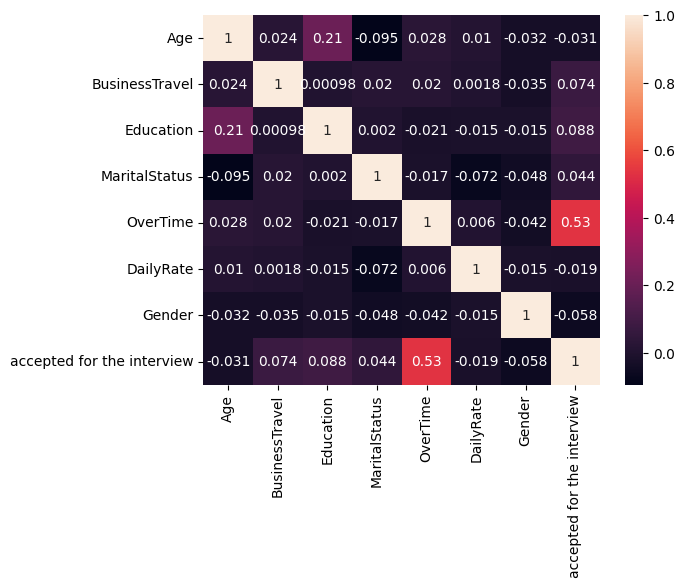

In [4]:
sns.heatmap(applicant_data_csv.corr() ,annot=True)

### Logistic Regression

In [5]:
logreg = LogisticRegression()
logreg.fit(applicant_data_train,applicant_data_train_labels)

logreg_predicted = logreg.predict(applicant_data_test)
logreg_score = logreg.score(applicant_data_test, applicant_data_test_labels)
logreg_report = classification_report(applicant_data_test_labels, logreg_predicted)
logreg_confusion_matrix = confusion_matrix(applicant_data_test_labels, logreg_predicted)

print("Logistic Regression Metrics")
print("Score: ", logreg_score)
print("Report: \n", logreg_report)
print("Confusion matrix: \n", logreg_confusion_matrix)

Logistic Regression Metrics
Score:  0.9063545150501672
Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       268
           1       0.59      0.32      0.42        31

    accuracy                           0.91       299
   macro avg       0.76      0.65      0.68       299
weighted avg       0.89      0.91      0.89       299

Confusion matrix: 
 [[261   7]
 [ 21  10]]


### Naive Bayes

In [6]:
nb = GaussianNB()
nb.fit(applicant_data_train,applicant_data_train_labels)

nb_predicted = nb.predict(applicant_data_test)
nb_score = nb.score(applicant_data_test, applicant_data_test_labels)
nb_report = classification_report(applicant_data_test_labels, nb_predicted)
nb_confusion_matrix = confusion_matrix(applicant_data_test_labels, nb_predicted)

print("Naive Bayes Metrics")
print("Score: ", nb_score)
print("Report: \n", nb_report)
print("Confusion matrix: \n", nb_confusion_matrix)

Naive Bayes Metrics
Score:  0.8662207357859532
Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       268
           1       0.43      0.97      0.60        31

    accuracy                           0.87       299
   macro avg       0.72      0.91      0.76       299
weighted avg       0.94      0.87      0.89       299

Confusion matrix: 
 [[229  39]
 [  1  30]]


### K-Nearest Neighbors

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(applicant_data_train,applicant_data_train_labels)

knn_predicted = knn.predict(applicant_data_test)
knn_score = knn.score(applicant_data_test, applicant_data_test_labels)
knn_report = classification_report(applicant_data_test_labels, knn_predicted)
knn_confusion_matrix = confusion_matrix(applicant_data_test_labels, knn_predicted)

print("K-Nearest Neighbors Metrics")
print("Score: ", knn_score)
print("Report: \n", knn_report)
print("Confusion matrix: \n", knn_confusion_matrix)

K-Nearest Neighbors Metrics
Score:  0.9765886287625418
Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       268
           1       0.96      0.81      0.88        31

    accuracy                           0.98       299
   macro avg       0.97      0.90      0.93       299
weighted avg       0.98      0.98      0.98       299

Confusion matrix: 
 [[267   1]
 [  6  25]]
